In [ ]:
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz

In [ ]:
from keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print('Train data shape: ', trainX.shape)
print('Train labels shape: ', trainY.shape)
print('Test data shape: ', testX.shape)
print('Test labels shape: ', testY.shape)

Train data shape:  (60000, 28, 28)
Train labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


In [ ]:
import os
import cv2
import numpy as np

train_image = 'train-images-idx3-ubyte'
train_label = 'train-labels-idx1-ubyte'
test_image = 't10k-images-idx3-ubyte'
test_label = 't10k-labels-idx1-ubyte'

for f in [train_image, train_label, test_image, test_label]:
	os.system('wget --no-check-certificate http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/%s.gz' % (f,))
	
for f in [train_image, train_label, test_image, test_label]:
	os.system('gunzip %s.gz' % (f,))

for image_f, label_f in [(train_image, train_label), (test_image, test_label)]:
    with open(image_f, 'rb') as f:
        images = f.read()
    with open(label_f, 'rb') as f:
        labels = f.read()
        
    images = [d for d in images[16:]]
    images = np.array(images, dtype=np.uint8)
    images = images.reshape((-1,28,28))
    
    ground_truths = labels[8:]
	
    outdir = image_f + "_folder"
    if not os.path.exists(outdir):
        os.mkdir(outdir)
    for k,image in enumerate(images):
        # image directory
        img_directory = os.path.join(outdir, str(ground_truths[k]))

        # create folder if not existed
        if not os.path.exists(img_directory):
            os.makedirs(img_directory)

        cv2.imwrite(os.path.join(outdir, str(ground_truths[k]), '%05d.png' % (k,)), image)

    labels = [outdir + '/%05d.png %d' % (k, l) for k,l in enumerate(labels[8:])]
    with open('%s.txt' % label_f, 'w') as f:
        f.write(os.linesep.join(labels))

In [ ]:
ground_truths = labels[8:]
print(len(ground_truths))
print(len(images))

In [ ]:
ls -l

total 56620
drwx------  3 root root     4096 Oct 18 08:35 gdrive/
drwxr-xr-x  1 root root     4096 Aug 27 16:17 sample_data/
-rw-r--r--  1 root root  7840016 Aug 31  2017 t10k-images-idx3-ubyte
drwxr-xr-x 12 root root     4096 Oct 18 09:05 t10k-images-idx3-ubyte_folder/
-rw-r--r--  1 root root    10008 Aug 31  2017 t10k-labels-idx1-ubyte
-rw-r--r--  1 root root   419999 Oct 18 09:05 t10k-labels-idx1-ubyte.txt
-rw-r--r--  1 root root 47040016 Aug 31  2017 train-images-idx3-ubyte
drwxr-xr-x 12 root root     4096 Oct 18 09:05 train-images-idx3-ubyte_folder/
-rw-r--r--  1 root root    60008 Aug 31  2017 train-labels-idx1-ubyte
-rw-r--r--  1 root root  2579999 Oct 18 09:05 train-labels-idx1-ubyte.txt


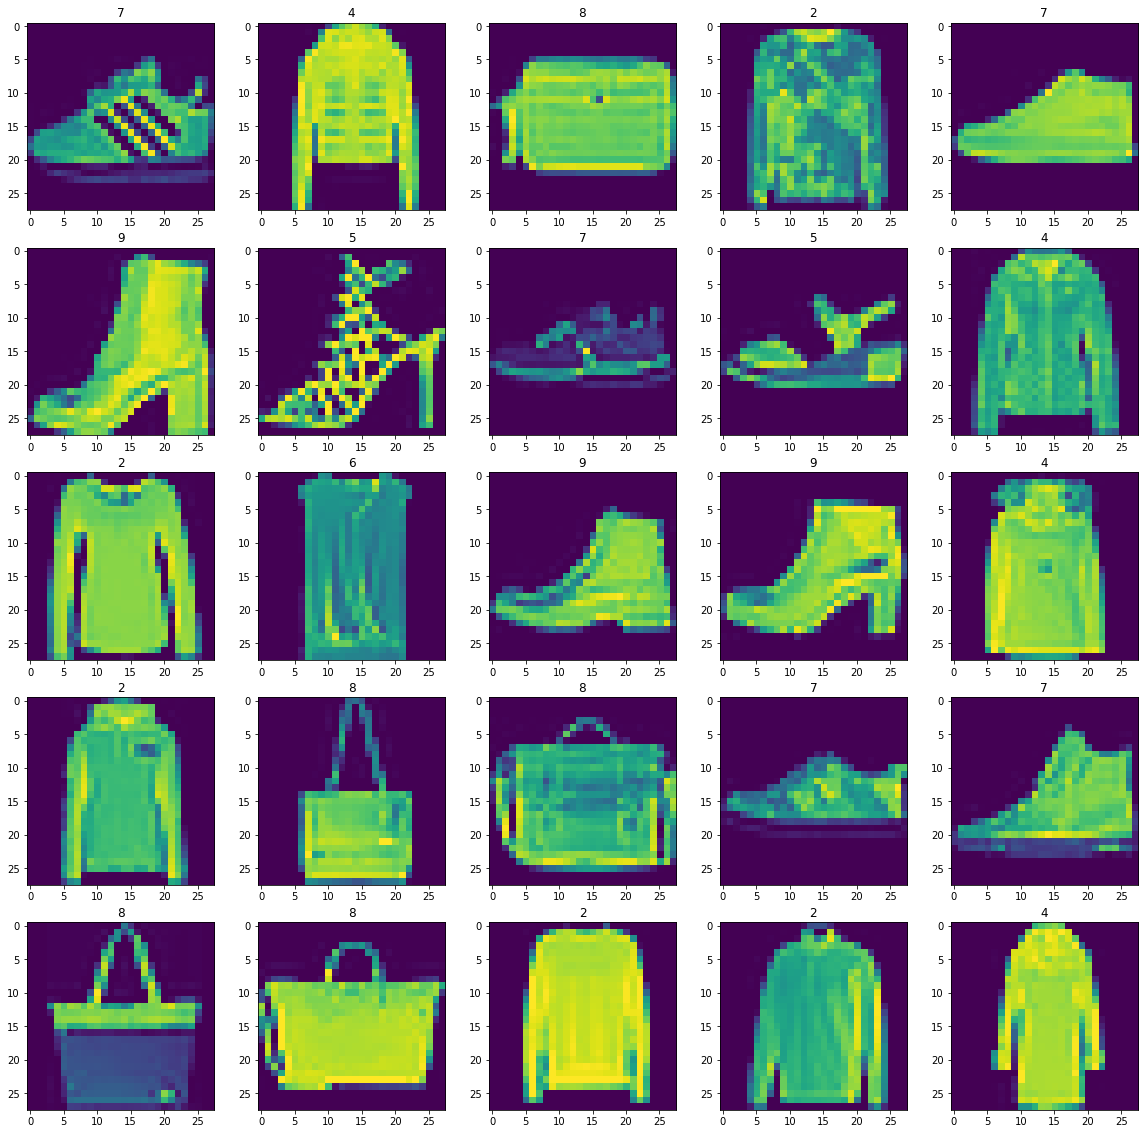

In [ ]:
#Images/n02105855-Shetland_sheepdog/n02105855_9415.jpg

import glob
import os

import numpy as np
from matplotlib.image import imread
%matplotlib inline
import matplotlib.pyplot as plt

# get image parts
def get_image_parts(image_path):
    """Given a full path to an image, return its parts."""
    parts = image_path.split(os.path.sep)
    #print(parts)
    filename = parts[2]
    filename_no_ext = filename.split('.')[0]
    classname = parts[1]
    train_or_test = parts[0]
    
    return train_or_test, classname, filename_no_ext, filename
    
    
sample_images = list(glob.glob(os.path.join('train-images-idx3-ubyte_folder/', '*/*'), recursive=True))
np.random.seed(42)
rand_imgs = np.random.choice(sample_images, size=5*5)
fig, axarr = plt.subplots(5, 5, figsize=(20, 20))

for i, rand_img in enumerate(rand_imgs):
    train_or_test, classname, filename_no_ext, filename = get_image_parts(rand_img)
    
    j = i // 5
    k = i % 5
    axarr[j][k].imshow(imread(rand_img))
    axarr[j][k].title.set_text(classname)
    axarr[j][k].grid(False)

In [ ]:
%rm -r train-images-idx3-ubyte_folder/
%rm -r t10k-images-idx3-ubyte_folder/

In [ ]:
from IPython.display import Image 
Image(filename='52493.png')

In [ ]:
cd train-images-idx3-ubyte_folder/

/content/train-images-idx3-ubyte_folder


In [ ]:
ls -l

In [ ]:
mv svhn_dataset svhn_train

In [ ]:
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

In [ ]:
from PIL import Image
import numpy

def convert_img_square(im_pth='', dest_path='', desired_size=224):
#     print(im_pth)
    
    im = Image.open(im_pth)
    old_size = im.size  # (width, height) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

#     new_im = im.resize(new_size, Image.ANTIALIAS)
    new_im = im.resize(new_size)
    
    new_im = new_im.convert('RGB')
    
    new_im.save(dest_path)

    return True
    
# path = 'train/0/twinjet_s_001442.png'
# dest_path = 't1/test4.jpg'

# orig_arr = convert_img_square(path, dest_path, 499)   

# #convert to RGB and Save
# # orig_arr = orig_arr.convert('RGB')
# # orig_arr.save('t1/test2.jpg')

# from IPython.display import Image 
# Image(filename='t1/test4.jpg')

In [ ]:
####=======================
import glob
import os
import shutil
import random

#move class folder from classname_# to classname/#

def get_image_parts(image_path):
    """Given a full path to an image, return its parts."""
    parts = image_path.split(os.path.sep)
    #print(parts)
    filename = parts[2]
    filename_no_ext = filename.split('.')[0]
    classname = parts[1]
    train_or_test = parts[0]
    
    return train_or_test, classname, filename_no_ext, filename

move_folders = ['train-images-idx3-ubyte_folder']
dest_folder = 'fashion_mnist_train_resized_299'
data_file = []

# look for all images in sub-folders
for folder in move_folders:
    class_folders = glob.glob(os.path.join(folder, '*'))
    print('folder %s' %class_folders)
    
#     for sub_folder in class_folders:
#         sub_class_folders = glob.glob(os.path.join(sub_folder, '*'))    
#         print('sub folder %s' %sub_class_folders)
        
    for iid_class in class_folders:
        print(iid_class)
        
        class_files = glob.glob(os.path.join(iid_class, '*.png'))
        
#         #Determize Set# (No Suffle)
        set = len(class_files)
        inner = range(0*set, 1*set) #all

        print('moving %d files' %(len(inner)))

#         random_list = random.sample(range(len(class_files)), int(len(class_files)/5)) #1/5 dataset
#         for idx in range(len(random_list)):

        for idx in range(len(inner)):
            src = class_files[inner[idx]]

            train_or_test, classname, filename_no_ext, filename = get_image_parts(src)
            dst = os.path.join(dest_folder, classname, filename)

            # image directory
            img_directory = os.path.join(dest_folder, classname)

            # create folder if not existed
            if not os.path.exists(img_directory):
                os.makedirs(img_directory)
                
            # convert image
            convert_img_square(src, dst, 299)
#             #moving file
#             shutil.move(src, dst)
# #                 shutil.copy(src, dst)


folder ['train-images-idx3-ubyte_folder/8', 'train-images-idx3-ubyte_folder/5', 'train-images-idx3-ubyte_folder/4', 'train-images-idx3-ubyte_folder/6', 'train-images-idx3-ubyte_folder/3', 'train-images-idx3-ubyte_folder/0', 'train-images-idx3-ubyte_folder/2', 'train-images-idx3-ubyte_folder/9', 'train-images-idx3-ubyte_folder/1', 'train-images-idx3-ubyte_folder/7']
train-images-idx3-ubyte_folder/8
moving 6000 files
train-images-idx3-ubyte_folder/5
moving 6000 files
train-images-idx3-ubyte_folder/4
moving 6000 files
train-images-idx3-ubyte_folder/6
moving 6000 files
train-images-idx3-ubyte_folder/3
moving 6000 files
train-images-idx3-ubyte_folder/0
moving 6000 files
train-images-idx3-ubyte_folder/2
moving 6000 files
train-images-idx3-ubyte_folder/9
moving 6000 files
train-images-idx3-ubyte_folder/1
moving 6000 files
train-images-idx3-ubyte_folder/7
moving 6000 files


In [ ]:
ls -l

In [ ]:
####=======================
import glob
import os
import shutil
import random

#move class folder from classname_# to classname/#

def get_image_parts(image_path):
    """Given a full path to an image, return its parts."""
    parts = image_path.split(os.path.sep)
    #print(parts)
    filename = parts[2]
    filename_no_ext = filename.split('.')[0]
    classname = parts[1]
    train_or_test = parts[0]
    
    return train_or_test, classname, filename_no_ext, filename

move_folders = ['t10k-images-idx3-ubyte_folder']
dest_folder = 'fashion_mnist_test_resized_299'
data_file = []

# look for all images in sub-folders
for folder in move_folders:
    class_folders = glob.glob(os.path.join(folder, '*'))
    print('folder %s' %class_folders)
    
#     for sub_folder in class_folders:
#         sub_class_folders = glob.glob(os.path.join(sub_folder, '*'))    
#         print('sub folder %s' %sub_class_folders)
        
    for iid_class in class_folders:
        print(iid_class)
        
        class_files = glob.glob(os.path.join(iid_class, '*.png'))
        
#         #Determize Set# (No Suffle)
        set = len(class_files)
        inner = range(0*set, 1*set) #all

        print('moving %d files' %(len(inner)))

#         random_list = random.sample(range(len(class_files)), int(len(class_files)/5)) #1/5 dataset
#         for idx in range(len(random_list)):

        for idx in range(len(inner)):
            src = class_files[inner[idx]]

            train_or_test, classname, filename_no_ext, filename = get_image_parts(src)
            dst = os.path.join(dest_folder, classname, filename)

            # image directory
            img_directory = os.path.join(dest_folder, classname)

            # create folder if not existed
            if not os.path.exists(img_directory):
                os.makedirs(img_directory)
                
            # convert image
            convert_img_square(src, dst, 299)
#             #moving file
#             shutil.move(src, dst)
# #                 shutil.copy(src, dst)


folder ['t10k-images-idx3-ubyte_folder/8', 't10k-images-idx3-ubyte_folder/5', 't10k-images-idx3-ubyte_folder/4', 't10k-images-idx3-ubyte_folder/6', 't10k-images-idx3-ubyte_folder/3', 't10k-images-idx3-ubyte_folder/0', 't10k-images-idx3-ubyte_folder/2', 't10k-images-idx3-ubyte_folder/9', 't10k-images-idx3-ubyte_folder/1', 't10k-images-idx3-ubyte_folder/7']
t10k-images-idx3-ubyte_folder/8
moving 1000 files
t10k-images-idx3-ubyte_folder/5
moving 1000 files
t10k-images-idx3-ubyte_folder/4
moving 1000 files
t10k-images-idx3-ubyte_folder/6
moving 1000 files
t10k-images-idx3-ubyte_folder/3
moving 1000 files
t10k-images-idx3-ubyte_folder/0
moving 1000 files
t10k-images-idx3-ubyte_folder/2
moving 1000 files
t10k-images-idx3-ubyte_folder/9
moving 1000 files
t10k-images-idx3-ubyte_folder/1
moving 1000 files
t10k-images-idx3-ubyte_folder/7
moving 1000 files


In [ ]:
rm -r svhn_test/

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
ls -l

In [ ]:
# !zip -r fashion_mnist_train_resized_299.zip fashion_mnist_train_resized_299
# !zip -r fashion_mnist_test_resized_299.zip fashion_mnist_test_resized_299

In [ ]:
# %cp fashion_mnist_train_resized_299.zip gdrive/My\ Drive/fashion_mnist_train_resized_299.zip
# %cp fashion_mnist_test_resized_299.zip gdrive/My\ Drive/fashion_mnist_test_resized_299.zip 

In [ ]:
%cp gdrive/My\ Drive/fashion_mnist_train_resized_299.zip fashion_mnist_train_resized_299.zip 
%cp gdrive/My\ Drive/fashion_mnist_test_resized_299.zip fashion_mnist_test_resized_299.zip 

In [ ]:
ls -l

In [ ]:
!unzip fashion_mnist_train_resized_299.zip
!unzip fashion_mnist_test_resized_299.zip

Archive:  fashion_mnist_train_resized_299.zip
   creating: fashion_mnist_train_resized_299/
   creating: fashion_mnist_train_resized_299/2/
  inflating: fashion_mnist_train_resized_299/2/56169.png  
  inflating: fashion_mnist_train_resized_299/2/44014.png  
  inflating: fashion_mnist_train_resized_299/2/22754.png  
  inflating: fashion_mnist_train_resized_299/2/15480.png  
  inflating: fashion_mnist_train_resized_299/2/34593.png  
  inflating: fashion_mnist_train_resized_299/2/56394.png  
  inflating: fashion_mnist_train_resized_299/2/17912.png  
  inflating: fashion_mnist_train_resized_299/2/45950.png  
  inflating: fashion_mnist_train_resized_299/2/34787.png  
  inflating: fashion_mnist_train_resized_299/2/17345.png  
  inflating: fashion_mnist_train_resized_299/2/35348.png  
  inflating: fashion_mnist_train_resized_299/2/59820.png  
  inflating: fashion_mnist_train_resized_299/2/02575.png  
  inflating: fashion_mnist_train_resized_299/2/53201.png  
  inflating: fashion_mnist_train_r

In [ ]:
#MUL 1 - Inception - ST

from keras.applications import InceptionV3
# from keras.applications import Xception
# from keras.applications.inception_resnet_v2 import InceptionResNetV2

from keras.models import Model
# from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, SimpleRNN, LSTM, GRU, Reshape, Concatenate,Bidirectional
from keras.applications.inception_v3 import preprocess_input

from keras.layers import GaussianNoise

# f1_base = Xception(weights='imagenet', include_top=False, input_shape=(450,450,3))
f1_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299,3))
f1_x = f1_base.output
f1_x = GlobalAveragePooling2D()(f1_x)

f1_x = Reshape([1,2048])(f1_x)  
f1_x = SimpleRNN(2048, 
            return_sequences=False,                       
#             dropout=0.8                                     
            input_shape=[1,2048])(f1_x)

#Regularization with noise
f1_x = GaussianNoise(0.1)(f1_x)

f1_x = Dense(1024, activation='relu')(f1_x)
f1_x = Dense(10, activation='softmax')(f1_x)
model_1 = Model(inputs=[f1_base.input],outputs=[f1_x])

print(model_1.summary())


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 149, 149, 32) 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 149, 149, 32) 0           batch_normalization_95[0][0]     
___________________________________________________________________________________________

In [ ]:
## fix for multi_gpu_model prediction time longer
from keras.layers import Lambda, concatenate
from keras import Model
import tensorflow as tf

def multi_gpu_model(model, gpus):
    if isinstance(gpus, (list, tuple)):
        num_gpus = len(gpus)
        target_gpu_ids = gpus
    else:
        num_gpus = gpus
        target_gpu_ids = range(num_gpus)

    def get_slice(data, i, parts):
        shape = tf.shape(data)
        batch_size = shape[:1]
        input_shape = shape[1:]
        step = batch_size // parts
        if i == num_gpus - 1:
            size = batch_size - step * i
        else:
            size = step
        size = tf.concat([size, input_shape], axis=0)
        stride = tf.concat([step, input_shape * 0], axis=0)
        start = stride * i
        return tf.slice(data, start, size)

    all_outputs = []
    for i in range(len(model.outputs)):
        all_outputs.append([])

    # Place a copy of the model on each GPU,
    # each getting a slice of the inputs.
    for i, gpu_id in enumerate(target_gpu_ids):
        with tf.device('/gpu:%d' % gpu_id):
            with tf.name_scope('replica_%d' % gpu_id):
                inputs = []
                # Retrieve a slice of the input.
                for x in model.inputs:
                    input_shape = tuple(x.get_shape().as_list())[1:]
                    slice_i = Lambda(get_slice,
                                   output_shape=input_shape,
                                   arguments={'i': i,
                                              'parts': num_gpus})(x)
                    inputs.append(slice_i)

                # Apply model on slice
                # (creating a model replica on the target device).
                outputs = model(inputs)
                if not isinstance(outputs, list):
                    outputs = [outputs]

                # Save the outputs for merging back together later.
                for o in range(len(outputs)):
                    all_outputs[o].append(outputs[o])

    # Merge outputs on CPU.
    with tf.device('/cpu:0'):
        merged = []
        for name, outputs in zip(model.output_names, all_outputs):
            merged.append(concatenate(outputs,
                                    axis=0, name=name))
        return Model(model.inputs, merged)


In [ ]:
from keras.callbacks import Callback
import pickle
import sys

#Stop training on val_acc
class EarlyStoppingByAccVal(Callback):
    def __init__(self, monitor='val_acc', value=0.00001, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current >= self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping" % epoch)
            self.model.stop_training = True

#Save large model using pickle formate instead of h5            
class SaveCheckPoint(Callback):
    def __init__(self, model, dest_folder):
        super(Callback, self).__init__()
        self.model = model
        self.dest_folder = dest_folder
        
        #initiate
        self.best_val_acc = 0
        self.best_val_loss = sys.maxsize #get max value
          
    def on_epoch_end(self, epoch, logs={}):
        val_acc = logs['val_acc']
        val_loss = logs['val_loss']

        if val_acc > self.best_val_acc:
            self.best_val_acc = val_acc
            
            # Save weights in pickle format instead of h5
            print('\nSaving val_acc %f at %s' %(self.best_val_acc, self.dest_folder))
            weigh= self.model.get_weights()

            #now, use pickle to save your model weights, instead of .h5
            #for heavy model architectures, .h5 file is unsupported.
            fpkl= open(self.dest_folder, 'wb') #Python 3
            pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
            fpkl.close()
            
#             model.save('tmp.h5')
        elif val_acc == self.best_val_acc:
            if val_loss < self.best_val_loss:
                self.best_val_loss=val_loss
                
                # Save weights in pickle format instead of h5
                print('\nSaving val_acc %f at %s' %(self.best_val_acc, self.dest_folder))
                weigh= self.model.get_weights()

                #now, use pickle to save your model weights, instead of .h5
                #for heavy model architectures, .h5 file is unsupported.
                fpkl= open(self.dest_folder, 'wb') #Python 3
                pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
                fpkl.close()                

In [ ]:
# mkdir checkpoints
ls -l

In [ ]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

test_datagen = ImageDataGenerator(
#     rescale = 1./255
    preprocessing_function=preprocess_input
)

NUM_GPU = 1
batch_size = 50

train_set = train_datagen.flow_from_directory('fashion_mnist_train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

valid_set = test_datagen.flow_from_directory('fashion_mnist_test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

model_txt = 'st'
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'SVHN_Inception_LRG299_STD.hdf5')

checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('svhn_output', 'logs', model_txt))

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('svhn_output', 'logs', model_txt + '-' + 'training-' + \
    str(timestamp) + '.log'))

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.9900, verbose=1)

#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_1, gpus=NUM_GPU)
else:
    model_mul = model_1
    
epochs = 20##!!!
lr = 1e-4
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=ceil(train_set.n/train_set.batch_size)
step_size_valid=ceil(valid_set.n/valid_set.batch_size)
# step_size_test=ceil(testing_set.n//testing_set.batch_size)

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
#     callbacks=[earlystopping],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
  18/1200 [..............................] - ETA: 1:12:23 - loss: 1.7403 - acc: 0.3778

In [ ]:
import numpy as np

print(result.history['val_acc'])
print(np.mean(result.history['val_acc']))
print(np.max(result.history['val_acc']))

print(result.history['acc'])
print(np.mean(result.history['acc']))
print(np.max(result.history['acc']))

In [ ]:
import matplotlib.pyplot as plt
history = result
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from __future__ import print_function

import argparse
import os
import shutil
import time
import random

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data as data
import torchvision.datasets as datasets
import models.fashion as models
import transforms
import numpy as np

from utils import Bar, Logger, AverageMeter, accuracy, mkdir_p, savefig


model_names = sorted(name for name in models.__dict__
                     if name.islower() and not name.startswith("__")
                     and callable(models.__dict__[name]))

# Datasets
dataset='fashionmnist'
workers=4
# Optimization options
epochs=300
start_epoch=0
train_batch=512
test_batch=100
lr=0.1
drop=0
schedule=[150, 225]
gamma=0.1
momentum=0.9
weight_decay=5e-4
# Checkpoints
checkpoint='checkpoint'
resume=''
arch='wrn'
depth=28
widen_factor=10
growthRate=12
compressionRate=2
# Miscs
manualSeed=7###
evaluate='' #####'evaluate model on validation set')


# Random Erasing
p=0.5
sh=0.4
r1=0.3


# state = ####{k: v for k, v in args._get_kwargs()}
state = {'lr' : 0.01}

# Validate dataset
assert dataset == 'fashionmnist'

# Use CUDA
use_cuda = torch.cuda.is_available()

# Random seed
if manualSeed is None:
	manualSeed = random.randint(1, 10000)
random.seed(manualSeed)
torch.manual_seed(manualSeed)
if use_cuda:
	torch.cuda.manual_seed_all(manualSeed)

best_acc = 0  # best test accuracy


def train(trainloader, model, criterion, optimizer, epoch, use_cuda):
    # switch to train mode
    model.train()
    
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    top1 = AverageMeter()
    top5 = AverageMeter()
    end = time.time()
    
    bar = Bar('Processing', max=len(trainloader))
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        # measure data loading time
        data_time.update(time.time() - end)
        
        if use_cuda:
            inputs, targets = inputs.cuda(), targets.cuda(async=True)
            
        inputs, targets = torch.autograd.Variable(inputs), torch.autograd.Variable(targets)
        
        # compute output
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # measure accuracy and record loss
        prec1, prec5 = accuracy(outputs.data, targets.data, topk=(1, 5))
        losses.update(loss.item(), inputs.size(0))
        top1.update(prec1.item(), inputs.size(0))
        top5.update(prec5.item(), inputs.size(0))
        
        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()
        
        # plot progress
        bar.suffix  = '({batch}/{size}) Data: {data:.3f}s | Batch: {bt:.3f}s | Total: {total:} | ETA: {eta:} | Loss: {loss:.4f} | top1: {top1: .4f} | top5: {top5: .4f}'.format(
            batch=batch_idx + 1,
            size=len(trainloader),
            data=data_time.avg,
            bt=batch_time.avg,
            total=bar.elapsed_td,
            eta=bar.eta_td,
            loss=losses.avg,
            top1=top1.avg,
            top5=top5.avg,
        )
        bar.next()
    bar.finish()
    return (losses.avg, top1.avg)

def test(testloader, model, criterion, epoch, use_cuda):
    global best_acc
    
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    top1 = AverageMeter()
    top5 = AverageMeter()
    
    # switch to evaluate mode
    model.eval()
    
    end = time.time()
    bar = Bar('Processing', max=len(testloader))
    for batch_idx, (inputs, targets) in enumerate(testloader):
        # measure data loading time
        data_time.update(time.time() - end)
        
        if use_cuda:
            inputs, targets = inputs.cuda(), targets.cuda()
            
        inputs, targets = torch.autograd.Variable(inputs, volatile=True), torch.autograd.Variable(targets)
        
        # compute output
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # measure accuracy and record loss
        prec1, prec5 = accuracy(outputs.data, targets.data, topk=(1, 5))
        losses.update(loss.item(), inputs.size(0))
        top1.update(prec1.item(), inputs.size(0))
        top5.update(prec5.item(), inputs.size(0))
        
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()
        
        # plot progress
        bar.suffix  = '({batch}/{size}) Data: {data:.3f}s | Batch: {bt:.3f}s | Total: {total:} | ETA: {eta:} | Loss: {loss:.4f} | top1: {top1: .4f} | top5: {top5: .4f}'.format(
            batch=batch_idx + 1,
            size=len(testloader),
            data=data_time.avg,
            bt=batch_time.avg,
            total=bar.elapsed_td,
            eta=bar.eta_td,
            loss=losses.avg,
            top1=top1.avg,
            top5=top5.avg,
        )
        bar.next()
    bar.finish()
    return (losses.avg, top1.avg)

def save_checkpoint(state, is_best, checkpoint='checkpoint', filename='checkpoint.pth.tar'):
    filepath = os.path.join(checkpoint, filename)
    torch.save(state, filepath)
    if is_best:
        shutil.copyfile(filepath, os.path.join(checkpoint, 'model_best.pth.tar'))
        
def adjust_learning_rate(optimizer, epoch):
    global state
    if epoch in schedule:
        state['lr'] *= gamma
        for param_group in optimizer.param_groups:
            param_group['lr'] = state['lr']

if not os.path.isdir(checkpoint):
    mkdir_p(checkpoint)
    
# Data
print('==> Preparing dataset %s' % dataset)
transform_train = transforms.Compose([
    transforms.RandomCrop(28, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    transforms.RandomErasing(probability = p, sh = sh, r1 = r1, mean = [0.4914]),
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

if dataset == 'fashionmnist':
    dataloader = datasets.FashionMNIST
    num_classes = 10
trainset = dataloader(root='./data', train=True, download=True, transform=transform_train)
trainloader = data.DataLoader(trainset, batch_size=train_batch, shuffle=True, num_workers=workers)

testset = dataloader(root='./data', train=False, download=False, transform=transform_test)
testloader = data.DataLoader(testset, batch_size=test_batch, shuffle=False, num_workers=workers)
